In [ ]:
import tweepy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
df=pd.read_csv('/content/Uber_new.csv')

In [ ]:
df

,Unnamed: 0,User,Tweet,Time,Favorite Count,Retweet Count,Source,Location,Userverified
0,0,DrManishaSingh2,@UberINSupport How a cab in such a shabby con...,2023-05-16 13:32:26+00:00,0,0,Twitter for Android,"नई दिल्ली, भारत",False
1,1,fK2aqyobYrvtud4,@UberINSupport uber app is always disappointed...,2023-05-16 13:30:57+00:00,0,0,Twitter for Android,NaN,False
2,2,truthprevails25,@UberINSupport @Uber_India @Uber_Nagpur have y...,2023-05-16 13:30:46+00:00,0,0,Twitter for Android,NaN,False
3,3,arachna1207,@Uber_India @UberINSupport @as per the telepho...,2023-05-16 13:29:34+00:00,0,0,Twitter for Android,NaN,False
4,4,arachna1207,"RT @UberINSupport: @arachna1207 Hey Mansi, tha...",2023-05-16 13:29:14+00:00,0,0,Twitter for Android,NaN,False
...,...,...,...,...,...,...,...,...,...
2995,2995,mlrsrao0602,"RT @UberINSupport: @mlrsrao0602 Hi there, we h...",2023-05-07 08:07:55+00:00,0,1,Twitter for Android,NaN,False
2996,2996,hey_ayu_,@Uber_Support @Uber @Uber_India call me i need...,2023-05-07 07:59:01+00:00,0,0,Twitter for Android,"Gurgaon, India",False
2997,2997,BwdDaniel,@UberINSupport I'm unable to contact customer ...,2023-05-07 07:50:31+00:00,0,0,Twitter for Android,"Mumbai, India",False
2998,2998,naggymoodles,"@UberINSupport As a woman passenger, I also do...",2023-05-07 07:48:46+00:00,0,0,Twitter for iPhone,NaN,False


In [ ]:
df1=df.sample(n=3000)

In [ ]:
df1

In [ ]:
df2=df[:3000]

In [ ]:
df2

In [ ]:
#data cleaning
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+:","",tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub('<[^>]+>', '', tweet)
    tweet = re.sub(r'\bRT\b','',tweet)
    tweet = re.sub(r'\brt\b','',tweet)
    tweet = re.sub(r':','',tweet)
    tweet = re.sub(r'\n','',tweet)
    tweet = re.sub(r'https','',tweet)
    tweet = re.sub(r'#','',tweet)

    return tweet
df['Tweet'] = df['Tweet'].map(lambda x: cleaner(x))

In [ ]:
df=df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df

,Unnamed: 0,User,Tweet,Time,Favorite Count,Retweet Count,Source,Location,Userverified
0,0,DrManishaSingh2,How a cab in such a shabby condition was all...,2023-05-16 13:32:26+00:00,0,0,Twitter for Android,",",False
1,1,fK2aqyobYrvtud4,"uber app is always disappointed me, your driv...",2023-05-16 13:30:57+00:00,0,0,Twitter for Android,nan,False
2,2,truthprevails25,have you shut down your operations in nagpu...,2023-05-16 13:30:46+00:00,0,0,Twitter for Android,nan,False
3,3,arachna1207,"per the telephonic conversation,it was prom...",2023-05-16 13:29:34+00:00,0,0,Twitter for Android,nan,False
4,4,arachna1207,"Hey Mansi, thank you for flagging this to u...",2023-05-16 13:29:14+00:00,0,0,Twitter for Android,nan,False
...,...,...,...,...,...,...,...,...,...
2995,2995,mlrsrao0602,"Hi there, we have reviewed your concern and...",2023-05-07 08:07:55+00:00,0,1,Twitter for Android,nan,False
2996,2996,hey_ayu_,call me i need support from you guys.,2023-05-07 07:59:01+00:00,0,0,Twitter for Android,"Gurgaon, India",False
2997,2997,BwdDaniel,I'm unable to contact customer support for pr...,2023-05-07 07:50:31+00:00,0,0,Twitter for Android,"Mumbai, India",False
2998,2998,naggymoodles,"As a woman passenger, I also dont want to kee...",2023-05-07 07:48:46+00:00,0,0,Twitter for iPhone,nan,False


In [ ]:
#Remove Punctuations
def remove_punctuation(texts):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for ele in texts:
        if ele in punc:
            texts = str(texts).replace(ele, "")
    return texts

df["Tweet"]=df["Tweet"].map(lambda x: remove_punctuation(x))

In [ ]:
df['Tweet']= df['Tweet'].apply(lambda x:x.lower())

In [ ]:
#Remove Stopwords using nltk
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tweetList=df.Tweet.tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokens=[]
nltk.download("punkt")
for i in tweetList:
    tokens.append(word_tokenize(i))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.isnull().sum()

Unnamed: 0        0
User              0
Tweet             0
Time              0
Favorite Count    0
Retweet Count     0
Source            0
Location          0
Userverified      0
dtype: int64

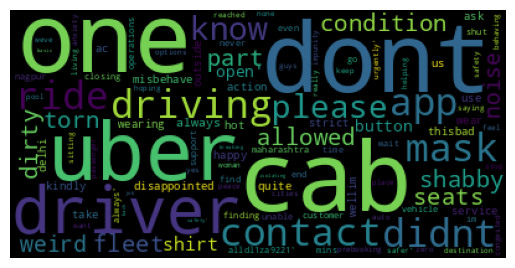

In [ ]:
#understanding the data
import matplotlib.pyplot as plt
text1=df["Tweet"].values
wordcloud = WordCloud().generate(str(text1))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
a=df['User'].unique()
print("unique users are",len(a))

unique users are 1878


In [ ]:
#sentiment analysis
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet_data= df.loc[:,'Tweet']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for tweet in tweet_data:
    tweet=str(tweet)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
polarity = percentage(polarity, len(tweet_list))

positive = round(positive,2)
negative = round(negative,2)
neutral = round(neutral,2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  6000
positive number:  2532
negative number:  2134
neutral number:  1334


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
negative_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,ola refusing refund cancellation amount wrongl...
1,giving complain mail got reply suggested route...
2,driver cancelled booking prior actual ride don...
3,last bill 44 estimate first time many times ha...
4,stop pay twice ride cant pay employees activit...
...,...
2295,frauds scammers
2296,really bad experience buying ola received call...
2297,3 months hell guys refunding money ticket id o...
2298,unable pay online paid cash ride still showing...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


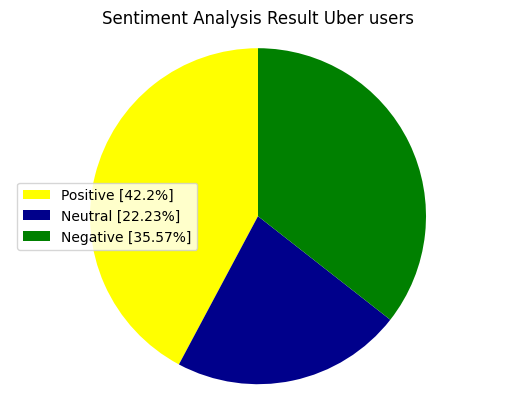

In [ ]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellow", "darkblue","green"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result Uber users")
plt.axis("equal")
plt.show()

In [ ]:
#lda topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
id2word = corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('allowed', 1),
  ('button', 1),
  ('cab', 3),
  ('condition', 1),
  ('dirty', 1),
  ('driver', 1),
  ('driving', 1),
  ('fleet', 1),
  ('noise', 1),
  ('open', 1),
  ('part', 1),
  ('seats', 1),
  ('shabby', 1),
  ('shirt', 1),
  ('torn', 1),
  ('uber', 1),
  ('weird', 1)]]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics(10,15))

[(0,
  '0.033*"take" + 0.029*"number" + 0.024*"guys" + 0.023*"amp" + '
  '0.022*"details" + 0.021*"action" + 0.020*"refund" + 0.020*"yet" + '
  '0.018*"one" + 0.018*"day" + 0.016*"got" + 0.016*"took" + 0.016*"back" + '
  '0.015*"id" + 0.013*"taken"'),
 (1,
  '0.090*"drivers" + 0.038*"dont" + 0.029*"know" + 0.028*"getting" + '
  '0.026*"cars" + 0.025*"u" + 0.023*"ask" + 0.023*"2" + 0.023*"rides" + '
  '0.020*"dealing" + 0.019*"unclean" + 0.019*"unappealing" + 0.019*"texting" + '
  '0.019*"unserviced" + 0.017*"understand"'),
 (2,
  '0.080*"cab" + 0.030*"hi" + 0.028*"need" + 0.026*"im" + 0.023*"airport" + '
  '0.021*"name" + 0.019*"life" + 0.019*"able" + 0.019*"care" + '
  '0.019*"customers" + 0.015*"trying" + 0.015*"time" + 0.014*"give" + '
  '0.014*"concern" + 0.013*"mobile"'),
 (3,
  '0.084*"sent" + 0.029*"sure" + 0.028*"make" + 0.027*"person" + '
  '0.020*"listening" + 0.020*"follow" + 0.018*"receiving" + 0.016*"travel" + '
  '0.015*"thing" + 0.015*"office" + 0.013*"area" + 0.013*"dir

In [ ]:
doc_lda = lda_model[corpus]

In [ ]:
doc_lda

In [ ]:
#Perplexity and Coherence Score
from gensim.models import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.441938476546742

Coherence Score:  0.38677395894628036


In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.033*"take" + 0.029*"number" + 0.024*"guys" + 0.023*"amp" + '
  '0.022*"details" + 0.021*"action" + 0.020*"refund" + 0.020*"yet" + '
  '0.018*"one" + 0.018*"day"'),
 (1,
  '0.090*"drivers" + 0.038*"dont" + 0.029*"know" + 0.028*"getting" + '
  '0.026*"cars" + 0.025*"u" + 0.023*"ask" + 0.023*"2" + 0.023*"rides" + '
  '0.020*"dealing"'),
 (2,
  '0.080*"cab" + 0.030*"hi" + 0.028*"need" + 0.026*"im" + 0.023*"airport" + '
  '0.021*"name" + 0.019*"life" + 0.019*"able" + 0.019*"care" + '
  '0.019*"customers"'),
 (3,
  '0.084*"sent" + 0.029*"sure" + 0.028*"make" + 0.027*"person" + '
  '0.020*"listening" + 0.020*"follow" + 0.018*"receiving" + 0.016*"travel" + '
  '0.015*"thing" + 0.015*"office"'),
 (4,
  '0.042*"story" + 0.035*"response" + 0.034*"team" + 0.033*"phone" + '
  '0.031*"brought" + 0.030*"present" + 0.030*"alive" + 0.024*"since" + '
  '0.024*"charge" + 0.023*"hit"'),
 (5,
  '0.068*"driver" + 0.065*"uber" + 0.040*"ride" + 0.032*"please" + '
  '0.028*"trip" + 0.018*"amount" + 0

In [ ]:
!pip install pyLDAvis

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word, mds='mmds')
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.448083 -0.076241       1        1  30.659236
0     -0.105426  0.357679       2        1  13.141958
2     -0.283509  0.183020       3        1   9.401055
6      0.220221 -0.316624       4        1   9.359588
7      0.341524 -0.083648       5        1   7.803280
1      0.323736  0.160742       6        1   7.690474
4      0.144223  0.328486       7        1   7.079122
9     -0.021478 -0.324834       8        1   6.839999
8     -0.198838 -0.216029       9        1   6.695928
3      0.027629 -0.012551      10        1   1.329359, topic_info=           Term        Freq       Total Category  logprob  loglift
5        driver  810.000000  810.000000  Default  30.0000  30.0000
15         uber  777.000000  777.000000  Default  29.0000  29.0000
70      drivers  269.000000  269.000000  Default  28.0000  28.0000
2           cab  291.000000  291.000000  Default  27.0000  27.0000
286    customer  217.000000  217.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
4003  kandivali    1.561227    2.403091  Topic10  -5.8012   3.8892
1271       lets    1.528670    2.371222  Topic10  -5.8222   3.8815
3457  promotion    1.373011    2.214224  Topic10  -5.9296   3.8426
4868   measures    1.337042    2.197646  Topic10  -5.9562   3.8235
2169    planned    1.274060    2.119663  Topic10  -6.0044   3.8114

[344 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
283       9  0.964959        10
234       6  0.990157         2
1676      3  0.984336         3
772       3  0.981597        30
1512      8  0.982999  aashishs
...     ...       ...       ...
311       5  0.976066     worst
940       2  0.990895     would
164       2  0.977699       yes
94        2  0.996115       yet
2321      5  0.956635      zero

[319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 7, 8, 2, 5, 10, 9, 4])

In [ ]:
#how to choose no of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokens, start=2,limit=40,step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


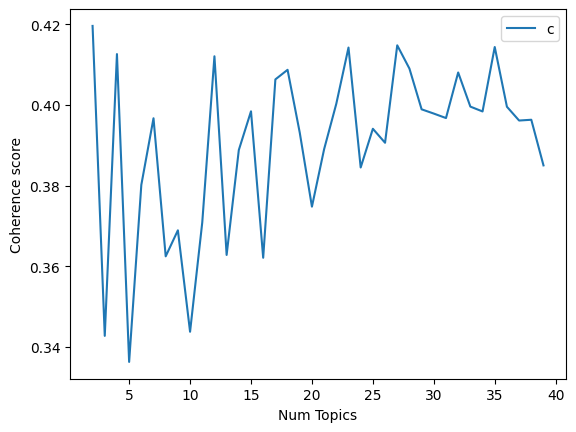

In [ ]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() #Print the coherence scores

In [ ]:
column_names = ['tweet']
negative_list.columns = column_names
neutral_list.columns = column_names
positive_list.columns = column_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
neg=negative_list['tweet'].tolist()
neu=neutral_list['tweet'].tolist()
pos=positive_list['tweet'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


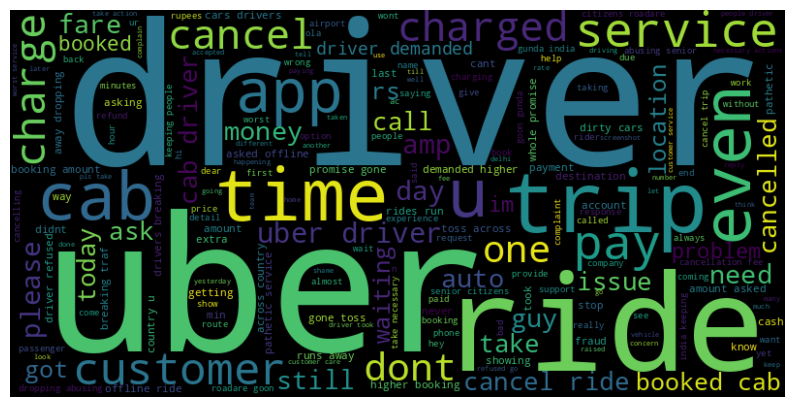

In [ ]:

#neutral_list = pd.DataFrame(neutral_list)
#negative_list = pd.DataFrame(negative_list)
#positive_list = pd.DataFrame(positive_list)

# Convert the list of negative words into a string
negative_text = ' '.join(neg)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


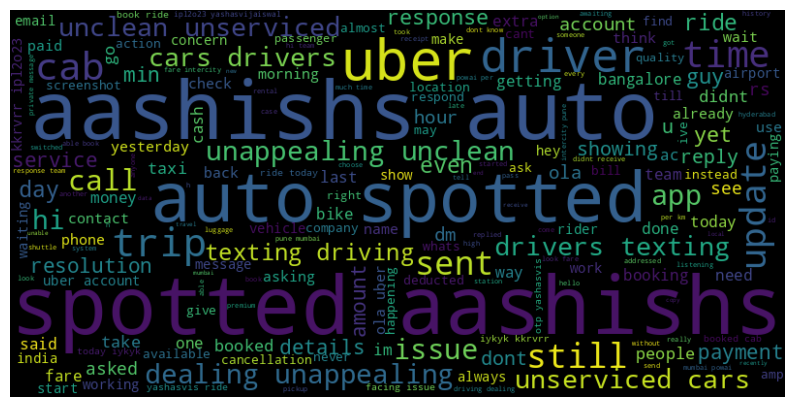

In [ ]:
# Convert the list of negative words into a string
neutral_text = ' '.join(neu)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


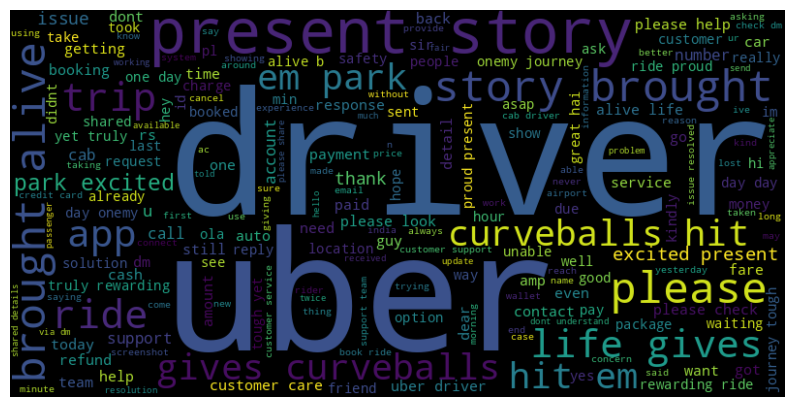

In [ ]:
# Convert the list of negative words into a string
positive_text = ' '.join(pos)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Get the topic-term distribution from the LDA model
topics = lda_model.show_topics(num_topics=10, num_words=10)  # Assuming 10 topics and 5 terms per topic

# Create a table of topics and terms
topic_terms = pd.DataFrame(columns=['Topic', 'Terms'])

for topic_id, topic in topics:
    words = re.findall(r'"([^"]+)"', topic)
    topic_terms.loc[len(topic_terms)] = [topic_id, words]

# Display the table
print(topic_terms)

   Topic                                              Terms
0      0  [take, number, guys, amp, details, action, ref...
1      1  [drivers, dont, know, getting, cars, u, ask, 2...
2      2  [cab, hi, need, im, airport, name, life, able,...
3      3  [sent, sure, make, person, listening, follow, ...
4      4  [story, response, team, phone, brought, presen...
5      5  [driver, uber, ride, please, trip, amount, boo...
6      6  [help, app, payment, account, contact, driving...
7      7  [customer, service, even, support, ac, days, t...
8      8  [fare, said, dm, pls, check, cant, pathetic, p...
9      9  [auto, people, going, thanks, use, see, bookin...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_terms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Terms
0,0,"[take, number, guys, amp, details, action, ref..."
1,1,"[drivers, dont, know, getting, cars, u, ask, 2..."
2,2,"[cab, hi, need, im, airport, name, life, able,..."
3,3,"[sent, sure, make, person, listening, follow, ..."
4,4,"[story, response, team, phone, brought, presen..."
5,5,"[driver, uber, ride, please, trip, amount, boo..."
6,6,"[help, app, payment, account, contact, driving..."
7,7,"[customer, service, even, support, ac, days, t..."
8,8,"[fare, said, dm, pls, check, cant, pathetic, p..."
9,9,"[auto, people, going, thanks, use, see, bookin..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


|index|Topic|Terms|
|---|---|---|
|0|0|take,number,guys,amp,details,action,refund,yet,one,day|
|1|1|drivers,dont,know,getting,cars,u,ask,2,rides,dealing|
|2|2|cab,hi,need,im,airport,name,life,able,care,customers|
|3|3|sent,sure,make,person,listening,follow,receiving,travel,thing,office|
|4|4|story,response,team,phone,brought,present,alive,since,charge,hit|
|5|5|driver,uber,ride,please,trip,amount,booked,get,issue,cancel|
|6|6|help,app,payment,account,contact,driving,way,times,tried,drop|
|7|7|customer,service,even,support,ac,days,taking,experience,worst,without|
|8|8|fare,said,dm,pls,check,cant,pathetic,package,really,rider|
|9|9|auto,people,going,thanks,use,see,booking,well,wait,find|